In [19]:
# This notebook was executed using python 3.10.7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



# Getting acquainted with the data 

In [2]:
df = pd.read_csv("jobfair_train.csv")

In [4]:
df.head(10)

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10
5,173,5990762,2912548,0) NonPayer,104,23,5.165491,5.014962,0.508691,28,...,Italy,iOS Phone,18,66,3.0,117,32,52,28,2
6,173,14223642,2911299,2) Minnow,2,23,5.331697,5.165514,0.260603,25,...,Cambodia,iOS Phone,21,105,6.0,313,19,48,27,2
7,173,11709507,2910371,0) NonPayer,16,24,3.881236,3.727657,0.587786,1,...,Indonesia,Android Phone,12,2,NaN,9,25,97,181,12
8,173,14492950,2905919,0) NonPayer,1,27,4.307879,4.078724,0.442616,7,...,Algeria,Android Phone,6,22,1.0,78,4,6,66,7
9,173,14436853,2906383,0) NonPayer,1,22,3.757782,3.536762,0.611114,3,...,Spain,Android Phone,14,12,NaN,47,39,31,66,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   55314 non-null  int64  
 1   club_id                                  55314 non-null  int64  
 2   league_id                                55314 non-null  int64  
 3   dynamic_payment_segment                  55314 non-null  object 
 4   cohort_season                            55314 non-null  int64  
 5   avg_age_top_11_players                   55314 non-null  int64  
 6   avg_stars_top_11_players                 55314 non-null  float64
 7   avg_stars_top_14_players                 55314 non-null  float64
 8   avg_training_factor_top_11_players       55314 non-null  float64
 9   days_active_last_28_days                 55314 non-null  int64  
 10  league_match_watched_count_last_28_days  55314

We'll probably have some work with those null values and the encoding

In [6]:
df.describe()

,season,club_id,league_id,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
count,55314.0,5.531400e+04,5.531400e+04,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,5.531400e+04,55314.000000,55314.000000,37763.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000
mean,173.0,1.210977e+07,2.909804e+06,23.409372,23.718661,4.533516,4.344776,0.584372,12.357089,3.623170,63.432169,2.955178e+07,12.411813,61.107694,3.901014,121.393897,113.133077,283.083523,307.085964,7.500000
std,0.0,3.384016e+06,2.102140e+03,42.009274,2.206240,1.204753,1.177068,0.178090,11.849102,5.906055,101.831670,5.233892e+07,6.403013,188.288285,2.625576,842.775529,3183.550398,789.250959,823.362486,4.031165
min,173.0,2.750000e+02,2.904743e+06,1.000000,18.000000,1.451697,1.354905,-1.287736,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-4975.000000,-169.000000,0.000000,1.000000
25%,173.0,1.151105e+07,2.907961e+06,2.000000,22.000000,3.691136,3.500062,0.479571,1.000000,0.000000,1.000000,7.364150e+04,8.000000,0.000000,1.000000,0.000000,11.000000,41.000000,52.000000,4.000000
50%,173.0,1.392822e+07,2.910038e+06,4.000000,23.000000,4.481376,4.311590,0.561158,7.000000,0.000000,16.000000,6.230431e+06,12.000000,11.000000,3.000000,38.000000,29.000000,88.000000,118.000000,7.500000
75%,173.0,1.424454e+07,2.911697e+06,17.000000,25.000000,5.217394,5.021726,0.648180,27.000000,5.000000,89.000000,3.768711e+07,17.000000,63.000000,6.000000,107.000000,73.000000,243.000000,281.000000,11.000000
max,173.0,1.451477e+07,2.912940e+06,172.000000,33.000000,23.716073,20.434876,5.164494,28.000000,26.000000,1365.000000,1.340479e+09,26.000000,7443.000000,11.000000,120233.000000,744202.000000,32767.000000,32767.000000,14.000000


Let's check for the distribution of the target variable

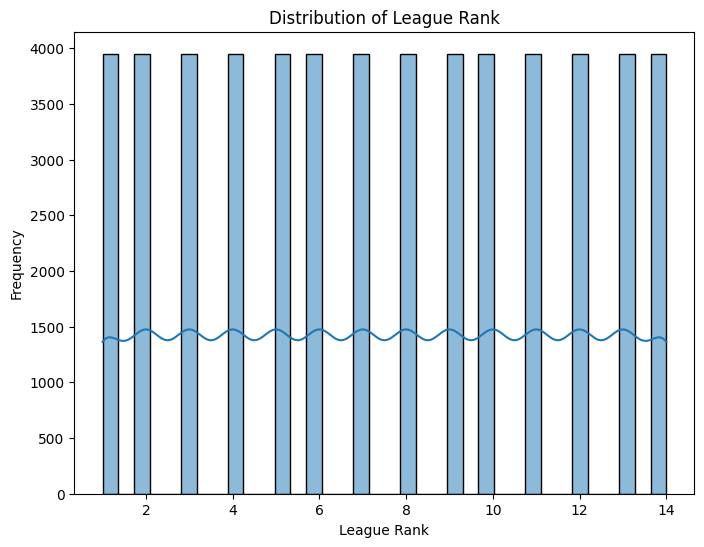

In [7]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='league_rank', kde=True)  
plt.title('Distribution of League Rank')
plt.xlabel('League Rank')
plt.ylabel('Frequency')
plt.show()


It seems we have a uniform distribution at our hands, this might make the job of regression a bit harder since there is no majority "class", so to say

C:\Users\vojislav\AppData\Local\Temp\ipykernel_17968\2495457087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


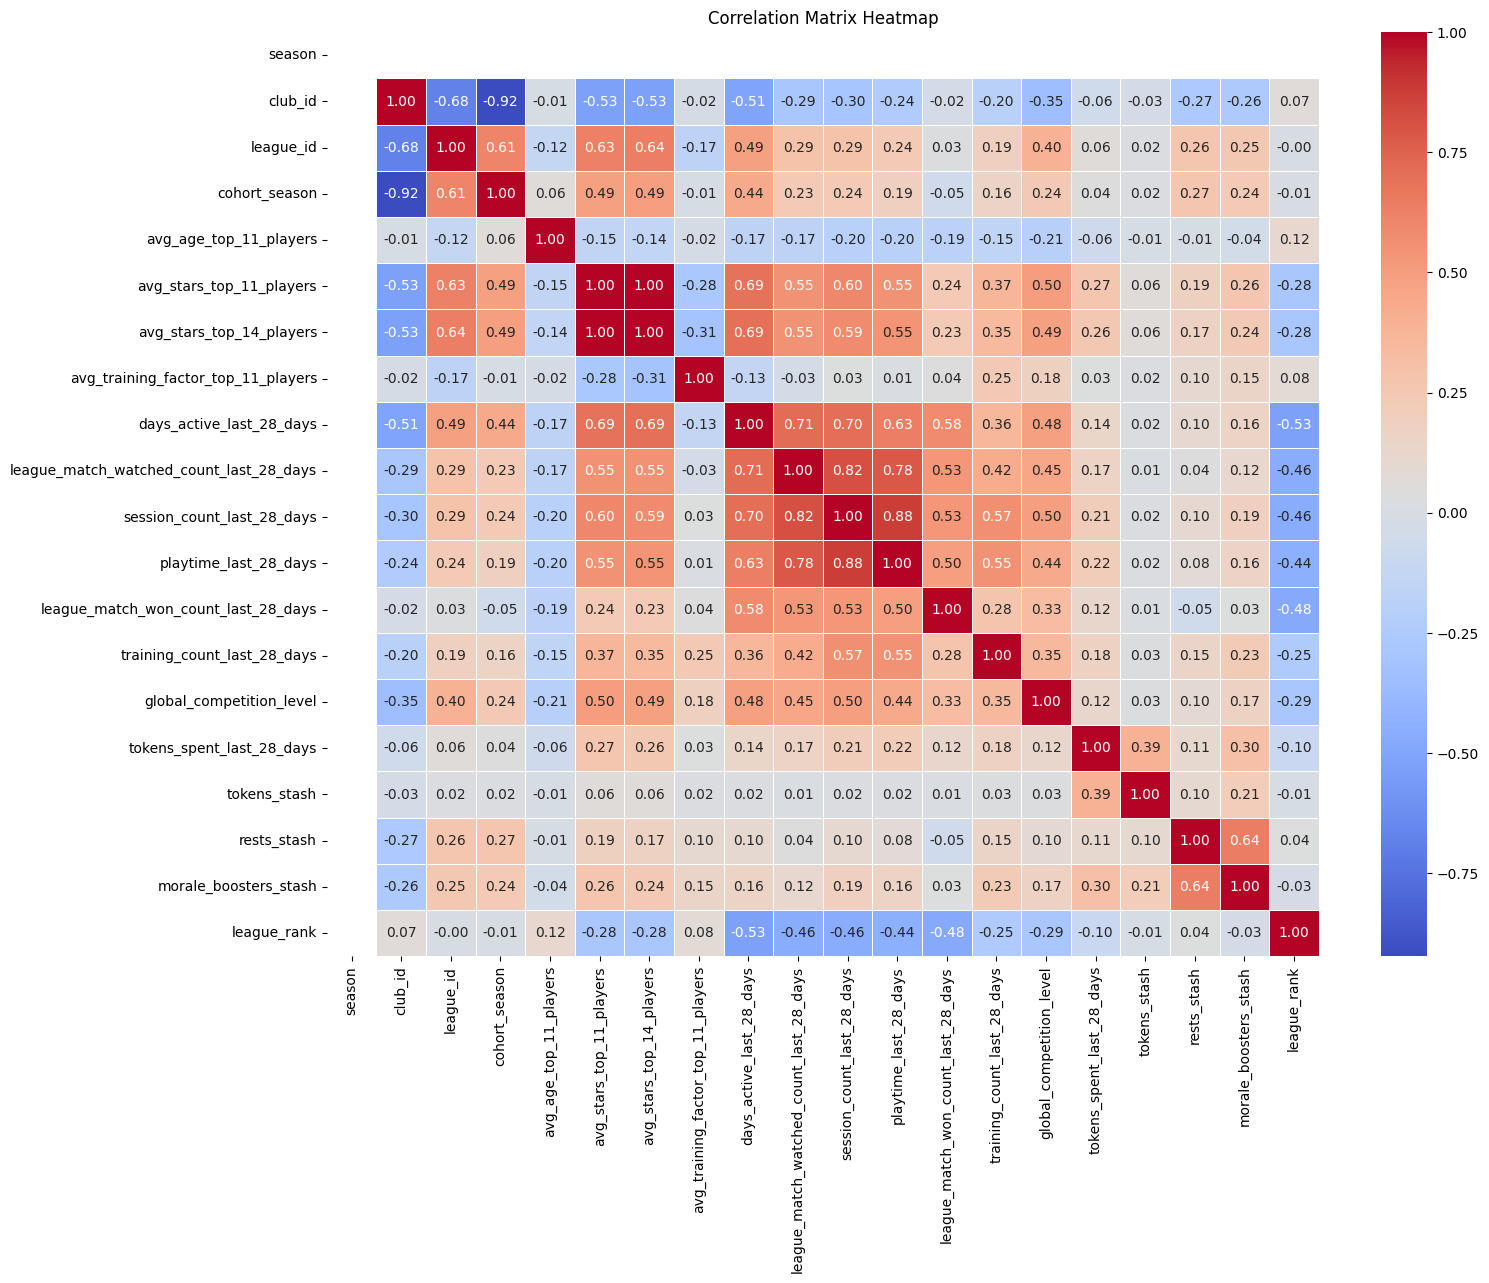

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(16,12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

There are some variables that have a singificant correlation with the target, so it's something to look out for when we come to the part of modelling, or perhaps feature engineering

Now let's see how we'll handle those null values in the *global_competition_level* feature

In [3]:
# I'll save the mean in this variable just in case we need it later, since it will be changed by the following imputation
global_competition_level_mean = df['global_competition_level'].mean()

# This I do for the simpler visualisation of the number of missing values
df['global_competition_level'] = df['global_competition_level'].fillna(0) 

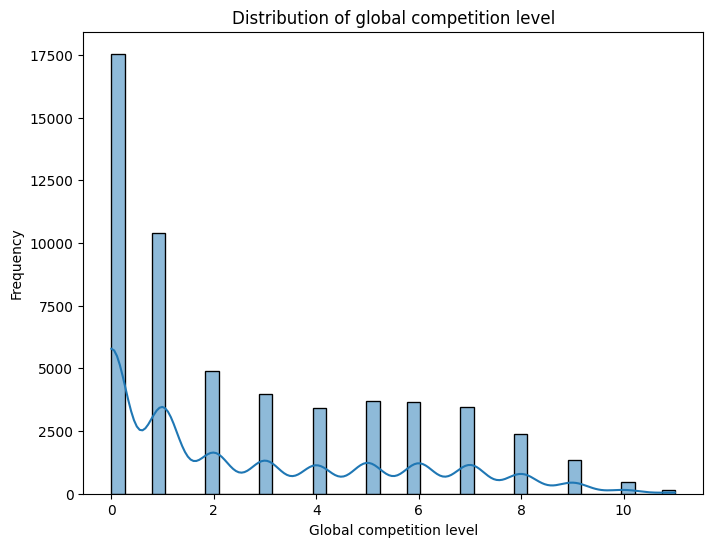

In [4]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='global_competition_level', kde=True)  
plt.title('Distribution of global competition level')
plt.xlabel('Global competition level')
plt.ylabel('Frequency')
plt.show()

There are a lot of missing values it seems, singificantly more than any other. It would be unwise to just straight up drop those rows, however there might be a nice way to get out of this predicament.

Let's try to fill those null values with the results of a predictive model

But first we must encode the categorical features

In [7]:
df_encoded = pd.get_dummies(df, columns=['dynamic_payment_segment','registration_platform_specific'])

train_data = df_encoded[df_encoded['global_competition_level']!=0]
test_data = df_encoded[df_encoded['global_competition_level']==0]

X_train = train_data.drop(['global_competition_level','league_rank','registration_country'], axis=1) # i drop league rank to avoid data leakage
y_train = train_data['global_competition_level'] 

model = RandomForestRegressor(random_state=27)
model.fit(X_train, y_train)

X_null = test_data.drop(['global_competition_level','league_rank','registration_country'], axis=1)
predicted_values = np.round(model.predict(X_null))

# Impute predicted values back into the original DataFrame
df_encoded.loc[df['global_competition_level']==0, 'global_competition_level'] = predicted_values

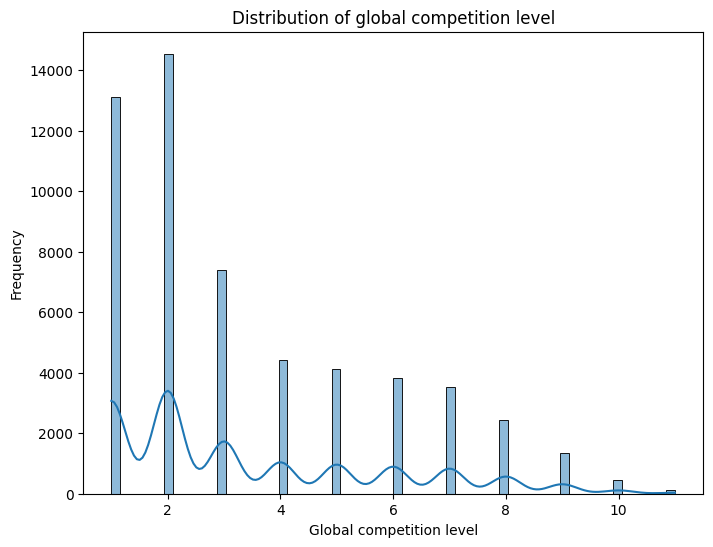

In [8]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df_encoded, x='global_competition_level', kde=True)  
plt.title('Distribution of global competition level')
plt.xlabel('Global competition level')
plt.ylabel('Frequency')
plt.show()

# Building the models

In [14]:
df_encoded = df_encoded.drop('registration_country',axis=1)
X = df_encoded.drop([
    'league_rank',
    'club_id',
    'league_id',
    # 'cohort_season',
    # 'season',
    # 'avg_age_top_11_players', 
    # 'avg_training_factor_top_11_players', 
    # 'tokens_spent_last_28_days',
    # 'tokens_stash',
    # 'rests_stash',
    # 'morale_boosters_stash'
    ], 
    axis=1)
y = df_encoded['league_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

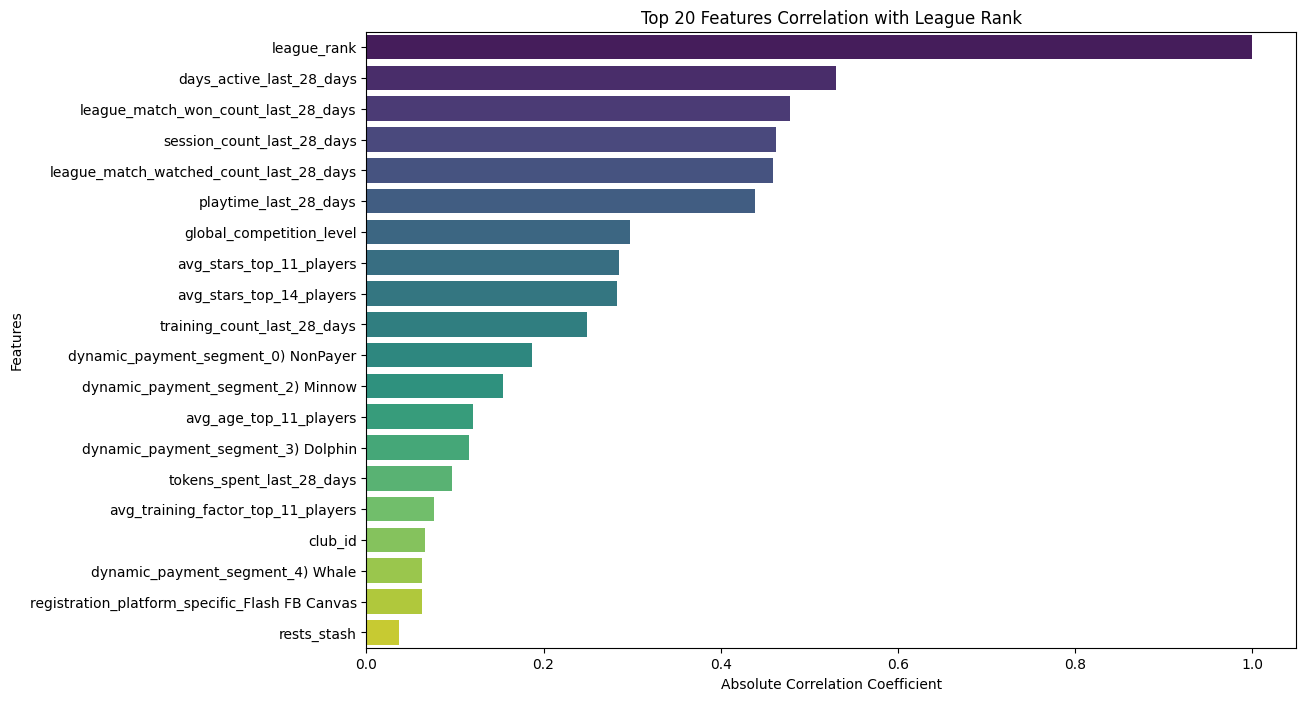

In [15]:
corr_matrix = df_encoded.corr()
correlations_with_target = corr_matrix['league_rank'].abs().sort_values(ascending=False)

top_20_features = correlations_with_target.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_features, y=top_20_features.index, palette='viridis')
plt.title('Top 20 Features Correlation with League Rank')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Let's start off with a simple linear regression model

In [18]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_pred = lin_reg_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: 0.37
MAE: 2.60
MSE: 10.29
RMSE: 3.21


Looking at the MAE value purely (which the models will be evaluated on), we can see that our model deviates on average for 2.6 ranks, which doesn't seem ideal. Perhaps a different, or more sophisticated model will capture the relationships between the features a bit better

In [17]:
rf_model = RandomForestRegressor(n_estimators=60, max_depth= 15, random_state=27, n_jobs=-1) 
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

y_rf_pred = np.round(y_rf_pred).astype(int)
rf_r2 = r2_score(y_test, y_rf_pred)
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest R-squared: {rf_r2:.2f}")
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")

Random Forest R-squared: 0.47
Random Forest MAE: 2.35
Random Forest MSE: 8.64
Random Forest RMSE: 2.94


Better! Let's get another model in the mix to really spice it up :D

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_regressor = GradientBoostingRegressor(n_estimators=96, learning_rate=0.1, max_depth=8, random_state=27,subsample=0.8)
gb_regressor.fit(X_train_scaled, y_train)

y_pred_gb = gb_regressor.predict(X_test_scaled)
y_pred_gb  = np.round(y_pred_gb).astype(int)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R-squared: {r2_gb:.2f}")

MAE: 2.3372
MSE: 8.58
RMSE: 2.93
R-squared: 0.47


Even better, so we'll stick with the Gradient boosting model and try to perfect it using hyperparameter optimization and some feature engineering

1. Clustering

In [21]:
from sklearn.cluster import KMeans

columns_for_clustering = ['days_active_last_28_days', 'league_match_watched_count_last_28_days',
       'session_count_last_28_days', 'playtime_last_28_days']

for season, data in df_encoded.groupby('season'):
    X_season = data[columns_for_clustering]
    
    num_clusters = min(len(X_season), 5)  
   
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data['season_cluster'] = kmeans.fit_predict(X_season)

    df_encoded.loc[df_encoded['season'] == season, 'season_cluster'] = data['season_cluster']

c:\Users\vojislav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vojislav\AppData\Local\Temp\ipykernel_17584\2007593053.py:14: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.loc[df_encoded['season'] == season, 'season_cluster'] = data['season_cluster']


2. These are some of the features I thought would be a useful addition to our model

In [22]:
# it's important to see that divison with 0 is impossible in this case
df_encoded['avg_playtime_per_session'] = df_encoded['playtime_last_28_days'] / df_encoded['session_count_last_28_days'].replace(0, 1) 

df_encoded['frequency_of_play_last_28_days'] = df_encoded['days_active_last_28_days'] / 28

df_encoded['matches_won_vs_watched'] = df_encoded['league_match_won_count_last_28_days'] - df_encoded['league_match_watched_count_last_28_days']

age_bins = [17,23,26, float('inf')]  # Define boundaries for 'Young', 'Middle aged', 'Older' players

age_labels = [0,1,2]

df_encoded['age_group'] = pd.cut(df_encoded['avg_age_top_11_players'], bins=age_bins, labels=age_labels)

In [29]:
X = df_encoded.drop([
    'league_rank',
    # 'club_id',
    # 'league_id',
    # 'cohort_season',
    # 'season',
    # 'avg_age_top_11_players', 
    # 'avg_training_factor_top_11_players', 
    # 'tokens_spent_last_28_days',
    # 'tokens_stash','rests_stash',
    # 'morale_boosters_stash'
    #'avg_stars_top_14_players',
    #'club_id',
    #'cohort_season',
    #'session_count_last_28_days'
    ], 
    axis=1)
y = df_encoded['league_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_regressor = GradientBoostingRegressor(n_estimators=96, learning_rate=0.1, max_depth=8, random_state=27,subsample=0.8)
gb_regressor.fit(X_train_scaled, y_train)

y_pred_gb = gb_regressor.predict(X_test_scaled)
y_pred_gb  = np.round(y_pred_gb).astype(int)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R-squared: {r2_gb:.2f}")

MAE: 2.1842
MSE: 7.65
RMSE: 2.77
R-squared: 0.53


We need to keep in mind that this is suboptimal, but effective

Hyperparameter optimization was done as such:

In [ ]:
for i in range(20,100,2):
    for j in range(8,9):
        gb_model =  GradientBoostingRegressor(n_estimators=i, random_state=27, max_depth=j, learning_rate=0.1, subsample=0.8) 
        gb_model.fit(X_train_scaled, y_train)

        y_gb_pred = gb_model.predict(X_test_scaled)
        y_gb_pred = np.round(y_gb_pred).astype(int)
        gb_mae = mean_absolute_error(y_test, y_gb_pred)

        print(f"Gradient boosting MAE: {gb_mae:.4f} on {i},{j}")

# Result evaluation
Residual analysis

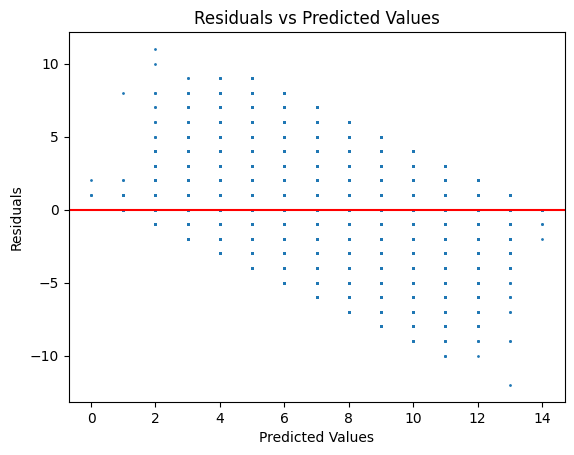

In [39]:
residuals = y_test - y_pred_gb

plt.scatter(y_pred_gb, residuals, s=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

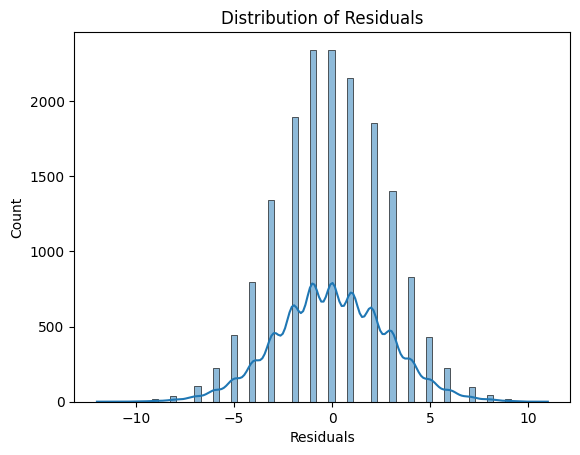

In [33]:
sns.histplot(residuals, kde=True)  
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

The residuals seem to be almost normally distributed, which is good in the sense that the model doesn't make many catastrophic mistakes and on average is wrong by 2.18 ranks

From this we can see that the most impactful features are:
- playtime
- league id (????)
- session count
- matches won
- and average stars top 11 players

This can be visualized 

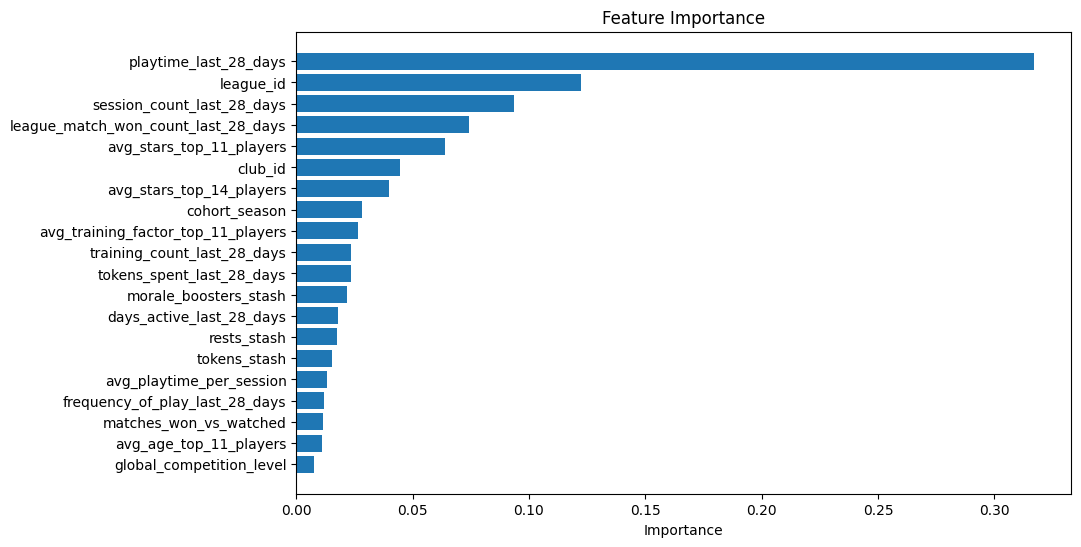

In [38]:
importances = gb_regressor.feature_importances_

feature_names = X.columns
feature_importance_df = pd.DataFrame(list(zip(feature_names, importances)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20))
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

In [40]:
df_test = pd.read_csv('jobfair_test.csv')

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60270 entries, 0 to 60269
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   60270 non-null  int64  
 1   club_id                                  60270 non-null  int64  
 2   league_id                                60270 non-null  int64  
 3   dynamic_payment_segment                  60270 non-null  object 
 4   cohort_season                            60270 non-null  int64  
 5   avg_age_top_11_players                   60270 non-null  int64  
 6   avg_stars_top_11_players                 60270 non-null  float64
 7   avg_stars_top_14_players                 60270 non-null  float64
 8   avg_training_factor_top_11_players       60270 non-null  float64
 9   days_active_last_28_days                 60270 non-null  int64  
 10  league_match_watched_count_last_28_days  60270

C:\Users\vojislav\AppData\Local\Temp\ipykernel_17584\425474629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_test.corr()


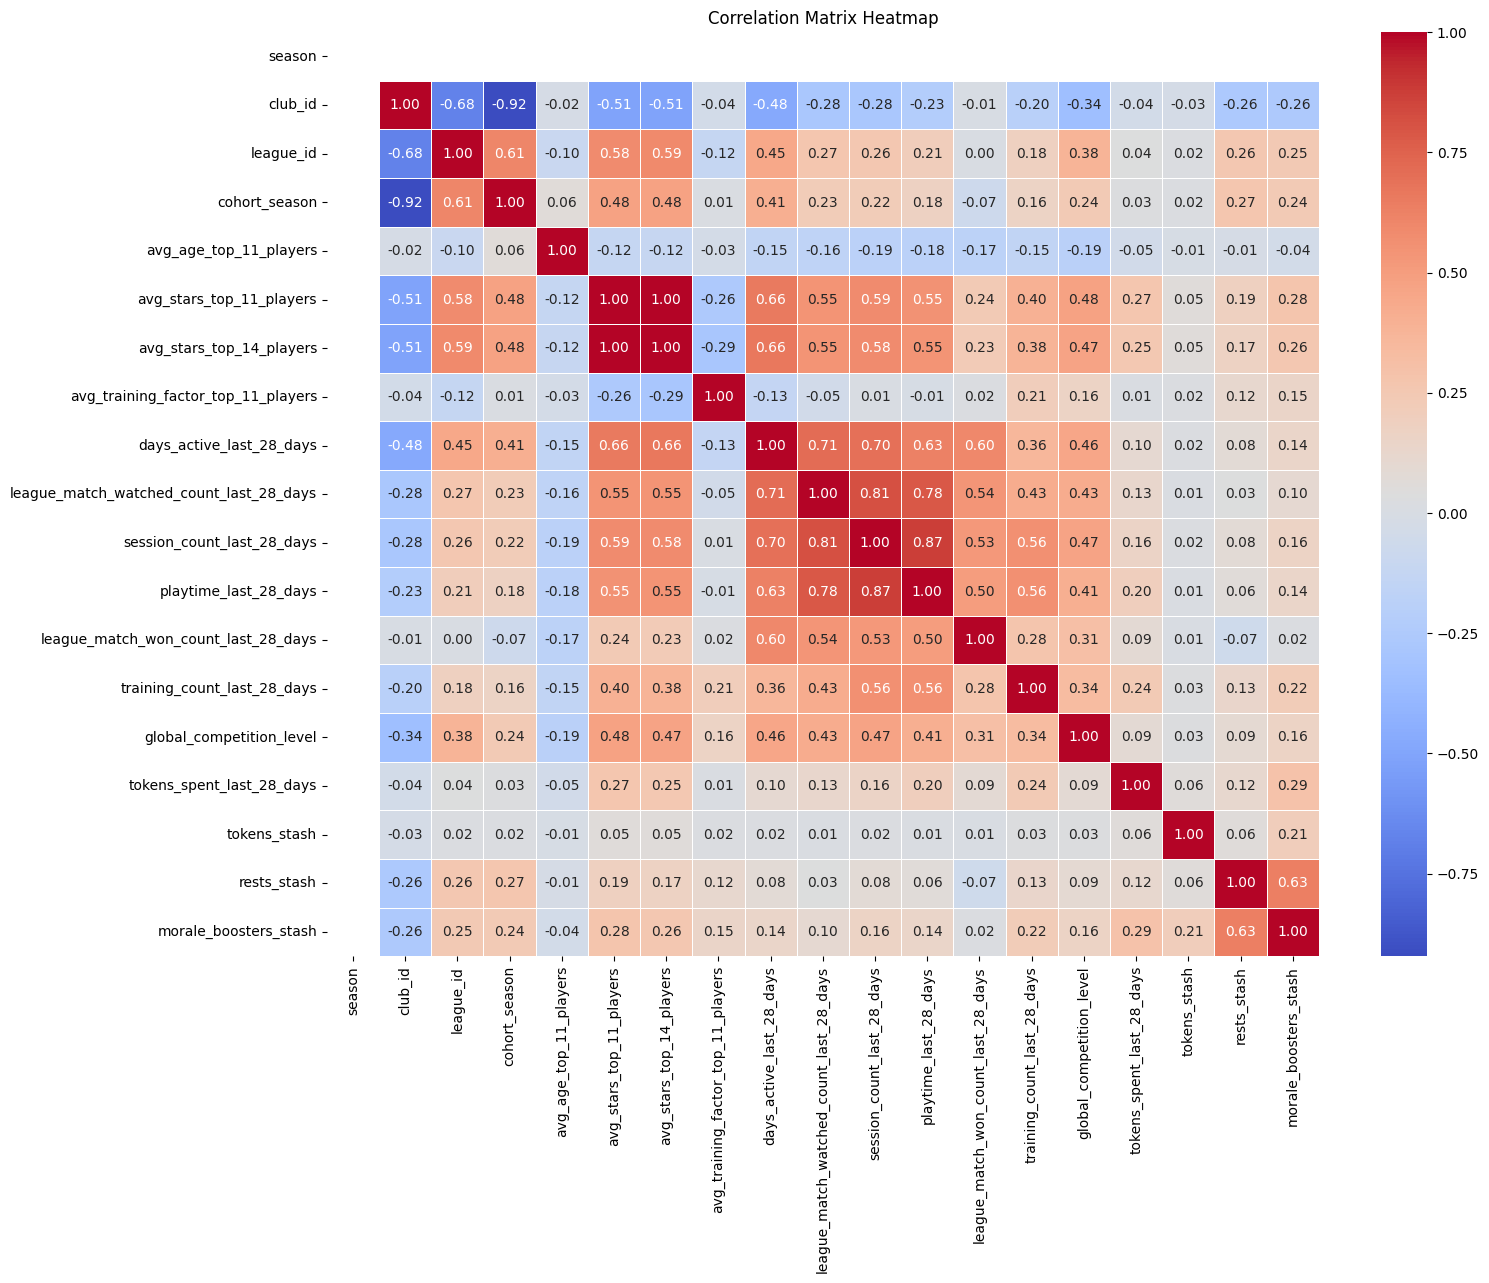

In [43]:
correlation_matrix = df_test.corr()
plt.figure(figsize=(16,12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

With checking the correlation heatmap we can see that the data is representative. Nice :)

In [47]:
df_test_encoded = pd.get_dummies(df_test, columns=['dynamic_payment_segment','registration_platform_specific'])

train_data = df_test_encoded[df_test_encoded['global_competition_level'].notnull()]
test_data = df_test_encoded[df_test_encoded['global_competition_level'].isnull()]

X_train = train_data.drop(['global_competition_level','registration_country'], axis=1) 
y_train = train_data['global_competition_level'] 

model = RandomForestRegressor(random_state=27)
model.fit(X_train, y_train)

X_null = test_data.drop(['global_competition_level','registration_country'], axis=1)
predicted_values = np.round(model.predict(X_null))

df_test_encoded.loc[df_test_encoded['global_competition_level'].isnull(), 'global_competition_level'] = predicted_values

In [48]:
columns_for_clustering = ['days_active_last_28_days', 'league_match_watched_count_last_28_days',
       'session_count_last_28_days', 'playtime_last_28_days']

for season, data in df_test_encoded.groupby('season'):
    X_season = data[columns_for_clustering]
    
    num_clusters = min(len(X_season), 5)  
   
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data['season_cluster'] = kmeans.fit_predict(X_season)

    df_test_encoded.loc[df_test_encoded['season'] == season, 'season_cluster'] = data['season_cluster']

c:\Users\vojislav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vojislav\AppData\Local\Temp\ipykernel_17584\500246048.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test_encoded.loc[df_test_encoded['season'] == season, 'season_cluster'] = data['season_cluster']


In [49]:
df_test_encoded['avg_playtime_per_session'] = df_test_encoded['playtime_last_28_days'] / df_test_encoded['session_count_last_28_days'].replace(0, 1) 

df_test_encoded['frequency_of_play_last_28_days'] = df_test_encoded['days_active_last_28_days'] / 28

df_test_encoded['matches_won_vs_watched'] = df_test_encoded['league_match_won_count_last_28_days'] - df_test_encoded['league_match_watched_count_last_28_days']

age_bins = [17,23,26, float('inf')]  # Defining boundaries for 'Young', 'Middle aged', 'Older' players

age_labels = [0,1,2]

df_test_encoded['age_group'] = pd.cut(df_test_encoded['avg_age_top_11_players'], bins=age_bins, labels=age_labels)

In [61]:
scaler = StandardScaler()
X = df_test_encoded.drop('registration_country', axis=1)
X = scaler.fit_transform(X)

y_pred_test = gb_regressor.predict(X)
y_pred_test = np.round(y_pred_test).astype(int)

final_df = pd.DataFrame()
final_df['club_id'] = df_test_encoded['club_id']
final_df['league_rank'] = y_pred_test

final_df.head()

,club_id,league_rank
0,14542747,4
1,11019672,5
2,14358567,11
3,14644461,9
4,13718978,3


In [62]:
final_df.to_csv('league_rank_predictions.csv')

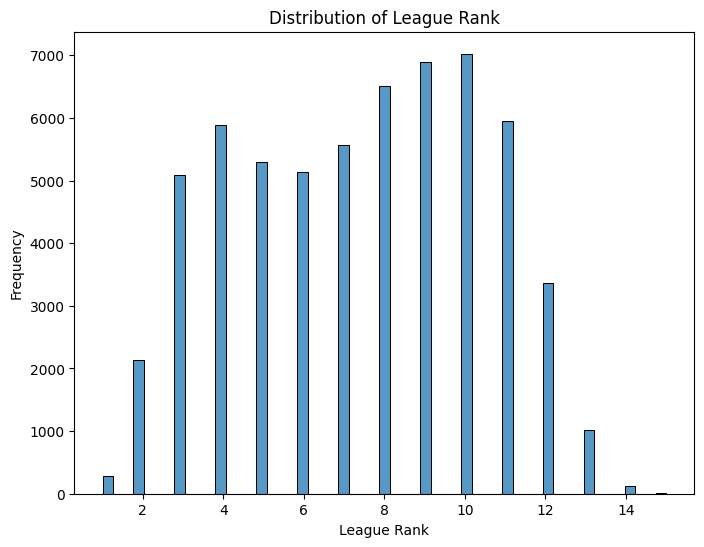

In [63]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=final_df, x='league_rank')  
plt.title('Distribution of League Rank')
plt.xlabel('League Rank')
plt.ylabel('Frequency')
plt.show()